<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=550, height=300></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

# <h2 style="text-align: center;"><b>Transfer Learning</b></h3>

!! В данном ноутбуке мы будем использовать предобученные модели (AlexNet и ResNet) для Transfer Learning, наша задача – классификация изображений пчел и муравьев. Также мы будем применять такие вещи как заморозка всех слоев, выборочная заморозка и модификация learning rate на разных частях нейросети (feature extractor, classifier)

Как Вы уже знаете в современных задачах обработки изображений, будь то задача обнаружения объектов, задача распознавания образов, задача (семантической) сегментации, задача классификации изображений и другие, всё чаще используют **свёрточные нейросети** (*Convolutional Neural Networks*, *CNN*).

Они показывают очень хорошие результаты, за ними стоит как [математический аппарат](https://stats.stackexchange.com/questions/269854/are-there-mathematical-reasons-for-convolution-in-neural-networks-beyond-expedie), так и эвристики, полученные опытным путём.

В данном задании Вам предстоит познакомиться с архитектурами *AlexNet*, *VGG* и *Inception* и для каждой из этих моделей использовать технику **Transfer Learning**.  

* **Transfer Learning** - это процесс дообучения на **новых данных** какой-либо нейросети, уже обученной до этого на других данных, обычно на каком-нибудь хорошем, большом (миллионы картинок) датасете (например, [ImageNet](http://www.image-net.org/) ~ 14 млн картинок).

<h2 style="text-align: center;"><b>AlexNet</b></h2>

**AlexNet** - нейронная сеть, которая победила в ILSVRC (соревнование по классификации картинок из ImageNet) в 2012 году и стала основой для многих других архитектур. Впервые она была представлена в статье  “ImageNet Classification with Deep Convolutional Neural Networks”, над которой работал Джоффри Хинтон - человек, которого многие называют отцом современного computer vision.

Архитектура описана на картинке ниже

<img src="https://www.learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png">

**AlexNet** состоит из 5 **сверточных** слоев, 3 **MaxPool** слоев и 2 **FullyConnected** слоев в конце. Обратите внимание, что в последнем пулинг слое окна, из которых берется максимум, пересекаются за счет того, что *stride*=2. Это изменение по сравнению с традиционным пулингом помогло снизить ошибку на 0.4%.

По сути **AlexNet** это самая базовая архитектура для сверточной сети после LeNet, которую мы уже писали на предыдущем занятии.

<h2 style="text-align: center;"><b>VGG</b></h3>

Один **сверточный** слой с фильтром 5$\times$5 можно заменить двумя подряд идущими слоями с фильтрами размером 3$\times$3, так как **воспринимаемая область** картинки у них будет одинаковой. При этом уменьшиться количество параметров, поэтому такую сеть будет легче обучать.

На момент создания VGG люди уже заметили, что чем больше слоев в нейросети, тем выше ее точность. Заменяя большие фильтры на несколько фильтров 3$\times$3 исследователи получили глубокую нейросеть с меньшим количеством параметров. Архитектура VGG-16 (версии VGG с 16 слоями) представлена на картинке ниже:


<img src="https://www.researchgate.net/publication/363656696/figure/fig5/AS:11431281353881863@1743824169181/Structure-of-VGG16-convolutional-neural-network_W640.jpg">

Когда говорят **VGG**, то чаще всего имеют ввиду **VGG-16** или **VGG-19**. Более глубоких версий **VGG** нет, так как после 19 слоев точность начинает падать.

Чтобы добиться высоких результатов в соревновании при обучении и валидации нейросети использовались дополнительные премы, подробнее о которых можно прочитать в [статье на Medium](https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11).


<h2 style="text-align: center;"><b>Inception v1</b></h3>

### Рассмотрим идею, которая подтолкнула исследователей к созданию этой архитектуры.

Площадь, которую занимает классифицируемый объект, может очень сильно отличаться. Пример на картинке ниже:

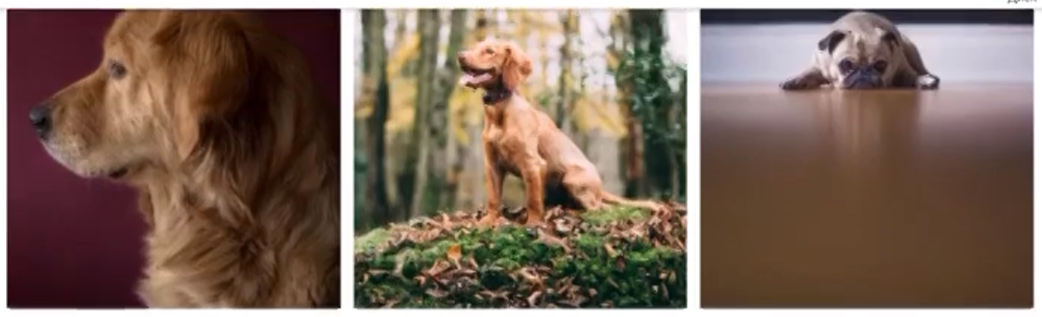

* Для извлечения информации с большой площади лучше всего подходят **большие** фильтры, и наоборот для маленьких объектов лучше **маленькие** фильтры.
* Глубокие нейронные сети намного сложнее обучать: в них появляется проблема **затухания градиента** и они **переобучаются**.
Чтобы решить первую проблему исследователи придумали **Incepton** модуль, который применяет фильтры разного размера и затем склеивает полученные каналы. При этом извлекается как информация из больших объектов, так и из маленьких. Простейшая реализация модуля выглядит так:

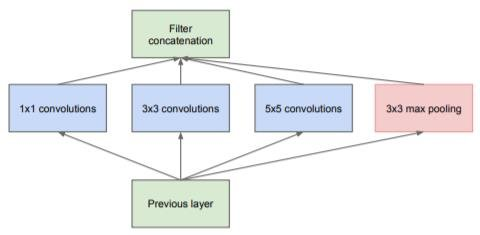

Но тогда появляется проблема из-за огромного количества параметров и числа каналов

Реализацию можно сделать более эффективной, если сначала уменьшить количество каналов с помощью **сверточного слоя** 1$\times$1 (на входе 256, на выходе 128)и лишь затем применить **слой** с фильтрами 5$\times$5. Сокращение вычислений происходит за счет того, что мы сначала **уменьшаем размерность** данных и лишь затем преобразовываем их. Продвинутая реализация:


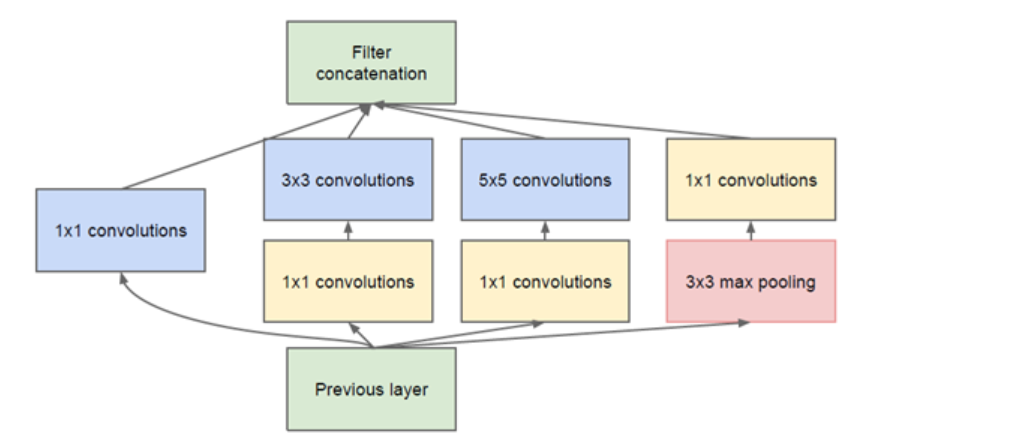

Сеть состоит из **корня** (нескольких сверточных слоев) и **Inception** модулей идущих за ним. Оранжевым прямоугольников выделен корень, а фиолетовыми - **вспомогательные классификаторы**. Именно они помогают бороться со второй проблемой, которую мы упомянули ранее. Наша функция потерь - взвешенная сумма **LogLoss** на двух **вспомогательных классификаторах** и **основном** в конце нейронной сети.

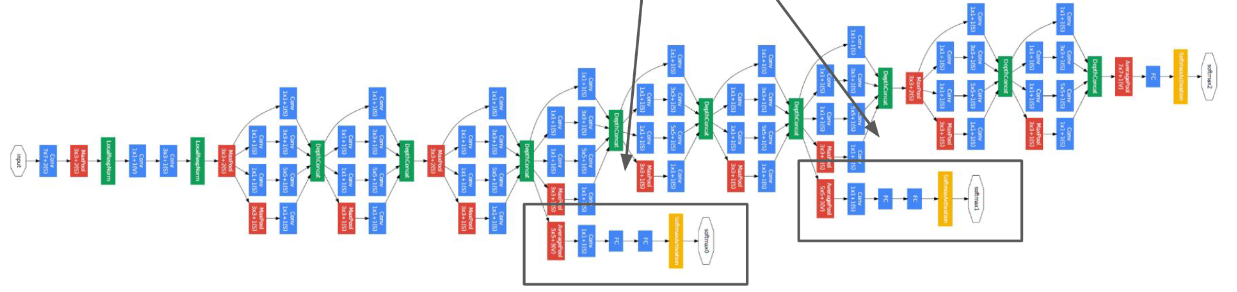

После Inception v1 были представлены 2, 3 и 4 версии, пррочитать о которых вы можете  в [статье на Medium](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202).

Однако сейчас научились иначе бороться с затуханием градиентов с помощью **residual connection**. Это позволило увеличить число слоев в нейронной сети.

Прокидываем изображения между слоями и градиенты затухают хуже

![](https://i.imgur.com/XwcnU5x.png)

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Теперь мы перейдем к тому, как можно использовать уже обученные нейросети, чтобы ускорить свою работу.

Давайте вспомним общую архитектуру CNN:
*   Feature extractor (эту роль играют сверточные сети)
*   Классификатор (FC слои)



<img src="https://drive.google.com/uc?id=14pApKqQjnmWMXazY0HHjREn9rI9uwCQg">

С помощью операций *свёртки (convolution)* и *пулинга (pooling)* всё, что расположено до этапа *classification*, по сути **извлекает признаки из объектов, подающихся на вход** (картинок, в данном случае). То есть вместо того, чтобы самим пытаться как-то описать картинки для хорошей работы классификатора, мы предоставляем заняться этим нейросети (обучая её методом обратного распространения ошибки ([лекция 4](https://www.youtube.com/watch?v=HZDOhHAg5_g))).

**Вопрос (творческий):**  А какие признаки для картинок приходят Вам в голову? (считать, что картинки цветные (3 канала), все одинакового размера)

**Ответ:** <Ваши мысли>

Представим теперь, что eсть свой набор данных, и Вы хотите научить сеть классифицировать объекты из Вашей выборки.  


Надеемся, что теперь Вам стало понятнее, как обучать крутые сети на новых данных.

<h2 style="text-align: center;"><b>Переходим к практике</b></h3>

<p style="text-align: center;"><i>(основано на http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)</i></p>

Мы будем пользоваться библиотекой PyTorch. Если Вы её ещё не установили, то вот [инструкция на Wiki по установке PyTorch](https://github.com/deepmipt/dlschl/wiki/%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%86%D0%B8%D1%8F-%D0%BF%D0%BE-%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5-PyTorch).

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os
from tqdm.notebook import tqdm

### В чём состоит задание

Вам предстоит попробовать использовать  типа архитектур свёрточных нейросетей - **AlexNet (сделано за Вас в примере), VGG16, Inception_v3** - как *Feature Extractor*, с помощью *Fine Tuning* и *"из коробки"*.

**Для каждого пункта нужно:**
- вывести график loss'а на обучающей и на валидационной выборке
- вывести качество модели (accuracy)

### Данные  

В данном задании используются сети (из библиотеки **torchvision**), предобученные на датасете ImageNet.  
В качестве новых данных будет датасет Меравьи vs Пчёлы, Вам нужно скачать его отсюда: **[Муравьи vs Пчёлы](https://download.pytorch.org/tutorial/hymenoptera_data.zip)**, *являющийся частью датасета ImageNet*. В нём 400 картинок, ~250 обучение и ~150 валидация (тест).

### Функции для отрисовки и обучения модели:

* Загрузим данные:

In [ ]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip

--2025-12-30 21:55:59--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.160.200.77, 18.160.200.126, 18.160.200.112, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.160.200.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   154MB/s    in 0.3s    

2025-12-30 21:55:59 (154 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_da

In [ ]:
# Преобразование обучающих данных для расширения обучающей выборки и её нормализация
# Для валидационной (тестовой) выборки только нормализация
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244), # случайно обрежем изображение по такому размеру
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244), # здесь неслучайная обрезка, по центру
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# папка с данными. Если запускаете в колабе, нужно скопировать данные к себе в директорию и примонтировать диск. Если запускаете локально -- просто скачайте данные
data_dir = './hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
# специальный класс для загрузки данных в виде батчей, кладет объекты по папкам train и val

train_dataloader = torch.utils.data.DataLoader(
    image_datasets["train"], batch_size=32,
    shuffle=True
)
val_dataloader = torch.utils.data.DataLoader(
    image_datasets["val"], batch_size=128 # при валидации можно больше выбирать так как мы не обучаем сеть
)

loaders = {
    "train": train_dataloader,
    "valid": val_dataloader
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

Размеры обучающей и валидационной выборок:

In [ ]:
print(dataset_sizes)

{'train': 244, 'val': 153}


**Вопрос (на понимание кода выше):**  
1. В DataLoader() выше стоит "shuffle=True". Для чего это нужно?
2. Сколько картинок будет в каждом батче?

**Ответ:**
1. Для того, чтобы данные при обучении нейронки подавались случайным образом
2. 32 для обучающего и 128 для валидационного датасетов

* Посмотрим на картинки из датасета:

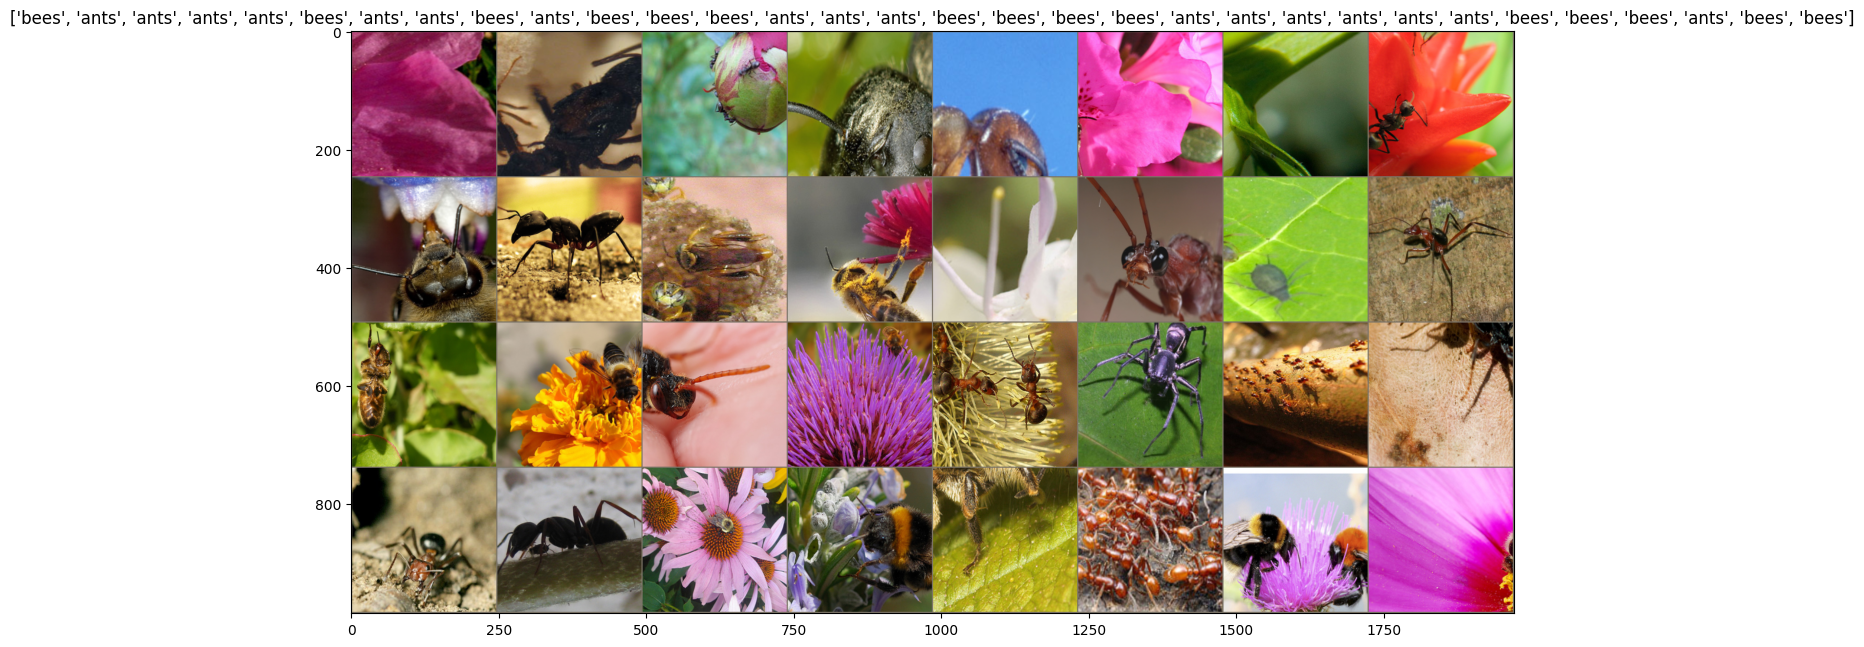

In [ ]:
from matplotlib import pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


# Получим 1 батч (картнки-метки) из обучающей выборки
inputs, classes = next(iter(loaders['train']))

# Расположим картинки рядом
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
image_datasets["train"][0]

(tensor([[[-0.6623, -0.6794, -0.6794,  ..., -0.7479, -0.7993, -0.7650],
          [-0.6965, -0.6965, -0.6623,  ..., -0.7479, -0.7650, -0.7479],
          [-0.6965, -0.6794, -0.6623,  ..., -0.7650, -0.7822, -0.7822],
          ...,
          [-0.6794, -0.6794, -0.6965,  ..., -0.5767, -0.5424, -0.5424],
          [-0.6794, -0.6794, -0.6794,  ..., -0.5767, -0.5424, -0.5424],
          [-0.6623, -0.6794, -0.6794,  ..., -0.5767, -0.5596, -0.5596]],
 
         [[ 0.6254,  0.6254,  0.6254,  ...,  0.6078,  0.5553,  0.5903],
          [ 0.5903,  0.5903,  0.6254,  ...,  0.6078,  0.5903,  0.6078],
          [ 0.5903,  0.6078,  0.6254,  ...,  0.5903,  0.5728,  0.5728],
          ...,
          [ 0.6429,  0.6429,  0.6254,  ...,  0.8179,  0.8704,  0.8704],
          [ 0.6254,  0.6254,  0.6254,  ...,  0.8354,  0.8704,  0.8704],
          [ 0.6429,  0.6254,  0.6254,  ...,  0.8354,  0.8529,  0.8529]],
 
         [[ 2.2566,  2.2566,  2.2566,  ...,  2.2566,  2.2043,  2.2391],
          [ 2.2217,  2.2217,

Мы выбрали обрезку по 244 неслучайно. Мы же будем дообучать AlexNet, которая обучена на ImageNet, и там использовались изображения такого разрешения

### Обучение моделей

Следующая функция будет использоваться для обучения модели. Аргументы:  
* model $-$ нейросеть
* loss $-$ оптимизируемая функция (criterion, cost function, objective)
* optimizer $-$ оптимизационный алгоритм
* scheduler $-$ политика изменения learning_rate
* num_epochs $-$ количество итераций обучения

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

Используем кусок кода из ноутбука HW_4

In [ ]:
def fit_one_epoch(model, train_dataloader, optimizer, loss_func):
  '''
  args:
    model - модель для обучения
    train_dataloader - loader с выборкой для обучения модели
    optimizer - оптимизатор, взятый из модуля `torch.optim`
    loss_func - функция потерь, взятая из модуля `torch.nn`

  функция возвращает метрику accuracy по эпохе на данных из train_dataloader
  '''

  epoch_correct_predictions = 0.0
  epoch_all_predictions = 0.0
  running_loss = 0.0
  # YOUR CODE. переводим модель в режим train
  model.train()


  for X_batch, y_batch in tqdm(train_dataloader):

    # Перемещаем данные на устройство модели
    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)

    # Далее далее по коду идут стандартные операции цикла обучения:
    # YOUR CODE. обнуляем градиенты модели
    optimizer.zero_grad()

    outp = model(X_batch)
    loss = loss_func(outp, y_batch)

    loss.backward() # YOUR CODE. считаем градиенты
    optimizer.step() # YOUR CODE. делаем шаг градиентного спуска

    # Рассчитаем accuracy. Для этого определим количество верных предсказаний
    # и общее количество предсказаний в каждом батче, а затем накопительным итогом посчитаем
    #  количество верных предсказаний и общее количество предсказаний в рамках эпохи
    preds = outp.argmax(-1)

    batch_size = y_batch.size(0)
    running_loss += loss.item() * batch_size
    epoch_correct_predictions += (preds == y_batch).sum().item()
    epoch_all_predictions += batch_size

  epoch_accuracy = epoch_correct_predictions / epoch_all_predictions
  epoch_loss = running_loss / epoch_all_predictions

  return epoch_accuracy, epoch_loss

In [ ]:
def eval_one_epoch(model, val_dataloader, loss_func):
  '''
  args:
    model - модель для обучения
    val_dataloader - loader с валидационной/тестовой выборкой
  '''

  epoch_correct_predictions = 0.0
  epoch_all_predictions = 0.0
  running_loss = 0.0

  model.eval()

  for X_batch, y_batch in tqdm(val_dataloader):

    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)

    with torch.no_grad():

      outp = model(X_batch)
      loss = loss_func(outp, y_batch)

    # YOUR CODE. Определяем нииболее вероятный класс для каждого объекта в батче
    preds = outp.argmax(-1)

    # Рассчитаем accuracy
    bs = y_batch.size(0)
    running_loss += loss.item() * bs
    epoch_correct_predictions += (preds == y_batch).sum().item()
    epoch_all_predictions += y_batch.size(0)

  epoch_accuracy = epoch_correct_predictions / epoch_all_predictions
  epoch_loss = running_loss / epoch_all_predictions
  return epoch_accuracy, epoch_loss

In [ ]:
def train_func(model, num_epochs, dataloaders, optimizer, loss_func):
  '''
  args:
    model - модель для обучения
    num_epochs - количество эпох
    dataloaders - словарь loader'ов с обучающей и валидационной выборками
    optimizer - оптимизатор, взятый из модуля `torch.optim`
    loss_func - функция потерь, взятая из модуля `torch.nn`
    logdir - директория для логирования в TensorBoard

  функция возвращает accuracy на обучающей и валидационной выборках на каждой эпохе
  '''

  history = {
      "train_acc": [], "valid_acc": [],
      "train_loss": [], "valid_loss": []
  }

  for epoch in range(num_epochs):
    print(f"\nEpoch: {epoch+1}")

    acc_train, loss_train = fit_one_epoch(
        model=model,
        train_dataloader=dataloaders['train'],
        optimizer=optimizer,
        loss_func=loss_func
    )
    print(f"Train | loss: {loss_train:.4f} | acc: {acc_train:.4f}")

    acc_valid, loss_valid = eval_one_epoch(
        model=model,
        val_dataloader=dataloaders['valid'],
        loss_func=loss_func
    )

    print(f"Valid | loss: {loss_valid:.4f} | acc: {acc_valid:.4f}")

    history["train_acc"].append(acc_train)
    history["valid_acc"].append(acc_valid)
    history["train_loss"].append(loss_train)
    history["valid_loss"].append(loss_valid)


  return history

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    epochs = range(1, len(history["train_acc"]) + 1)

    # Accuracy
    plt.figure(figsize=(7,4))
    plt.plot(epochs, history["train_acc"], label="train")
    plt.plot(epochs, history["valid_acc"], label="valid")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy per epoch")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Loss
    plt.figure(figsize=(7,4))
    plt.plot(epochs, history["train_loss"], label="train")
    plt.plot(epochs, history["valid_loss"], label="valid")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss per epoch")
    plt.grid(True)
    plt.legend()
    plt.show()


### Задание

Для каждой из следующих нейросетей:
* **AlexNet** (уже сделано в примере)
* **VGG16**
* **Inception_v3**

Напишите код и выведите результат (график лосса, accuracy и вывод примера классификации картинок с визализацией (с помощью функции `vizualize_model()`)) для трёх способов:
* Использование готовой нейросети **"из коробки"**
* Использование нейросети как **Feature Extractor**
* **Fine Tuning** нейросети

Для каждого пункта нужно:
* сделать с сетью то, что нужно в пункте ("из коробки", FE или FT)
* вывести график loss'а на обучающей и на валидационной выборке
* вывести качество модели (accuracy) на валидационной (тестовой) выборке
* (по желанию) использовать функцию visualize_model()

### AlexNet

ВНИМАНИЕ: Здесь использовалась библиотека catalyst, которая не работает (по словам авторов курса данная библиотека перестала поддерживаться и нужно ее заменить)

Вот код который был раннее. Для AlexNet


```
runner = ImgRunner()
runner.train(
    model=model,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(),
        dl.OptimizerCallback(),
        dl.AccuracyCallback()
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    main_metric="accuracy01",
    minimize_metric=False,
    logdir="logs/alexnet"
)
```

Также там показывались графики tensorboard:

```
%reload_ext tensorboard
%tensorboard --logdir logs
```
Но мне было удобнее нарисовать графики самостоятельно



*ПРИМЕЧАНИЕ: Здесь не выведены графики loss'а и не использована visualize_model(). От Вас это ожидается.*

Загрузка модели:

In [ ]:
model = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 130MB/s]


Посмотрим, что внутри:

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Тут есть feature extractor (только сверточные слои, активации и макспулинг) и classifier (линейные слои)

Также на выходе видим 1000 классов

Видим, что на вход классификатору (classifier) подаётся *9216 признаков*. Это и будет размер входа для нашего нового классификатора.

* **Fine Tuning** способ

Сконфигурируем - изменим FC-слой и зададим *cost function* и *оптимизирующий алгоритм*:

(*по умолчанию backpropagation распространяется на все слои, поэтому здесь мы только заменяем FC-слой на свой классификатор*)

In [ ]:
model.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [ ]:
# 2) Меняем последний классификатор на 2 класса
num_features = model.classifier[6].in_features  # обычно 4096
model.classifier[6] = nn.Linear(num_features, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
history = train_func(model,
                     num_epochs=10,
                     dataloaders=loaders,
                     optimizer=optimizer,
                     loss_func=criterion)



Epoch: 1


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.4909 | acc: 0.7746


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3757 | acc: 0.8431

Epoch: 2


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.3605 | acc: 0.8443


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2931 | acc: 0.9085

Epoch: 3


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2136 | acc: 0.9221


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3837 | acc: 0.8954

Epoch: 4


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2245 | acc: 0.9098


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3539 | acc: 0.8954

Epoch: 5


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1669 | acc: 0.9262


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3268 | acc: 0.8954

Epoch: 6


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1662 | acc: 0.9385


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3709 | acc: 0.8889

Epoch: 7


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1562 | acc: 0.9426


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3225 | acc: 0.8954

Epoch: 8


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1439 | acc: 0.9467


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3122 | acc: 0.8889

Epoch: 9


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1350 | acc: 0.9385


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2780 | acc: 0.9150

Epoch: 10


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1241 | acc: 0.9344


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3277 | acc: 0.8954


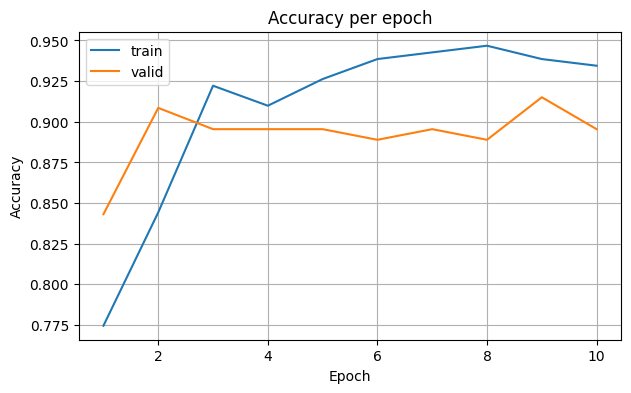

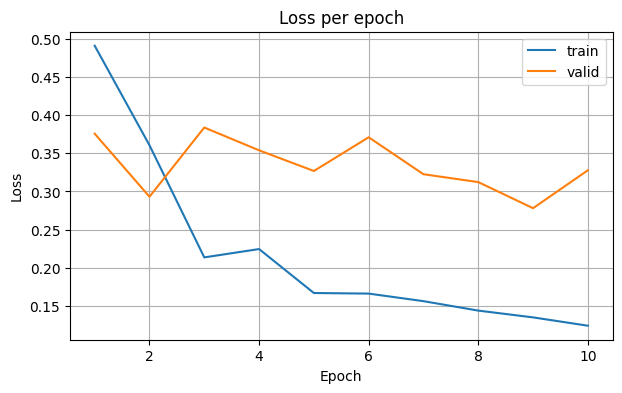

In [ ]:
plot_history(history)

Видим что accuracy на train датасете выше, чем на валидационном. Это связано с тем, что мы заменили последний обученный слой (1000 классов) на необученный (2 класса), соответственно там инициализировались случайные веса

А вот остальная модель обучена, и при подсчете градиентов - градиенты при первых итерациях неправильно передавались к след слою. Возможно мы испортим feature extractor, ктр будет выдавать фичи, способствующие переобучению на train

Итого на данный момент:

Valid | loss: 0.3277 | acc: 0.8954

# AlexNet с замороженными слоями

AlexNet со всеми замороженными слоями (кроме последнего с FC):


Давайте тогда не обучать feature extractor и все обученные слои, ктр у нас есть. Обучим только последний слой

* **Feature Extractor** способ:

In [ ]:
model_extractor = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)


Помним, что по-умолчанию все слои нейросети обучаются заново:

In [ ]:
for param in model_extractor.parameters():
    print(param.requires_grad)  # нужно ли считать градиенты для этого параметра
    break

True


Сделаем так, чтобы на них *не распространялся backpropagation* (заморозим их), и подменим классификатор (ведь старый уже с весами для ImageNet'а).

In [ ]:
# замораживаем параметры (веса)
for p in model_extractor.parameters():
    p.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier[6] = nn.Linear(num_features, 2)
model_extractor = model_extractor.to(device)

# Обучаем только классификатор

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_extractor.classifier[6].parameters(), lr=1e-4)

In [ ]:
history_freeze = train_func(model_extractor,
                            10,
                            loaders,
                            optimizer,
                            criterion)




Epoch: 1


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.5580 | acc: 0.6844


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.5385 | acc: 0.7516

Epoch: 2


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.5031 | acc: 0.7828


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.4498 | acc: 0.8170

Epoch: 3


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.4042 | acc: 0.8320


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3955 | acc: 0.8497

Epoch: 4


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.3505 | acc: 0.8852


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3633 | acc: 0.8627

Epoch: 5


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.3493 | acc: 0.8730


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3417 | acc: 0.8693

Epoch: 6


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.3445 | acc: 0.8607


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3245 | acc: 0.8954

Epoch: 7


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.3280 | acc: 0.8811


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3133 | acc: 0.8954

Epoch: 8


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2914 | acc: 0.8852


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3037 | acc: 0.8954

Epoch: 9


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.3175 | acc: 0.8730


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2946 | acc: 0.8954

Epoch: 10


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2591 | acc: 0.9262


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2872 | acc: 0.9020


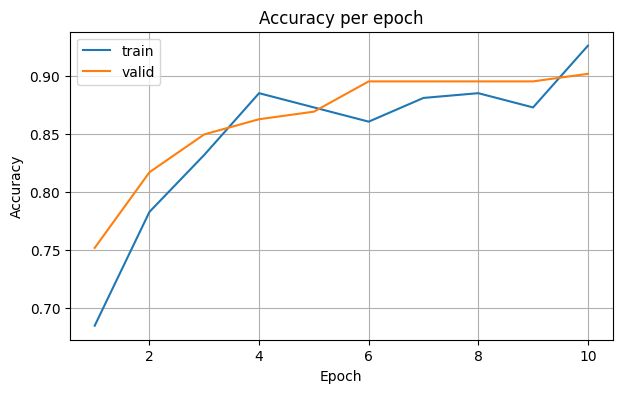

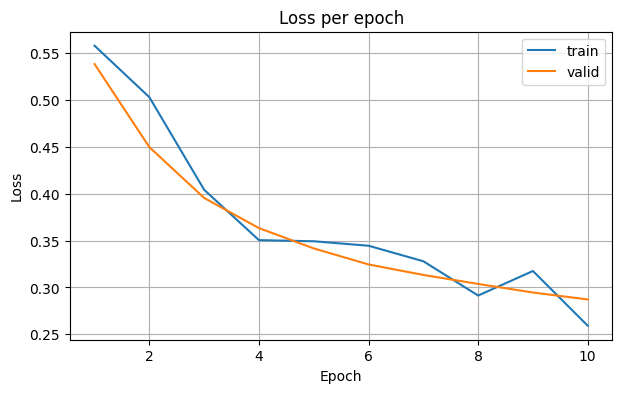

In [ ]:
plot_history(history_freeze)

Мы начали проигрывать в качестве. Но зато сетка перестала переобучаться, да и лосс стал стабильнее

Если пчела и муравьи нелинейно разделимы с точки зрения фичей, то мы не можем их разделить с помощью линейного слоя

Итого на данный момент:

Valid | loss: 0.3277 | acc: 0.8954

Valid | loss: 0.2872 | acc: 0.9020

# AlexNet смешанные замороженные слои

AlexNet с частично замороженными слоями (теперь остаются несколько последних из feature extractor и последний fc слой)


* **Смешанный** способ:
Мы будем обучать не только последний **fully connected** слой, но и несколько предпоследних

На первых слоях сверток паттерны простые, а на последних - сложнее. Их мы и будем преобучать

In [ ]:
model_mixed = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)


In [ ]:
model_mixed

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Заморозим все кроме последних 5 слоев в features

In [ ]:
layers_to_unfreeze = 5

# 1) Замораживаем всё
for p in model_mixed.parameters():
    p.requires_grad = False

# 2) Размораживаем последние layers_to_unfreeze модулей в сверточной части
# (features у AlexNet — это nn.Sequential)
for block in model_mixed.features[-layers_to_unfreeze:]:
    for p in block.parameters():
        p.requires_grad = True

# 3) Меняем последний FC под 2 класса и размораживаем classifier целиком
num_features = model_mixed.classifier[6].in_features  # обычно 4096
model_mixed.classifier[6] = nn.Linear(num_features, 2)

for p in model_mixed.classifier.parameters():
    p.requires_grad = True

# 4) Модель на device
model_mixed = model_mixed.to(device)

# 5) Оптимизатор: только параметры, которые реально обучаются
optimizer = torch.optim.Adam(
    (p for p in model_mixed.parameters() if p.requires_grad),
    lr=1e-4
)

loss_func = nn.CrossEntropyLoss()

In [ ]:
history_mixed = train_func(
    model=model_mixed,
    num_epochs=10,
    dataloaders=loaders,
    optimizer=optimizer,
    loss_func=loss_func
)





Epoch: 1


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.4546 | acc: 0.7582


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2862 | acc: 0.9020

Epoch: 2


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2563 | acc: 0.8770


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3232 | acc: 0.8954

Epoch: 3


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1642 | acc: 0.9344


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3788 | acc: 0.8954

Epoch: 4


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1817 | acc: 0.9262


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3934 | acc: 0.8758

Epoch: 5


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2040 | acc: 0.9180


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3589 | acc: 0.9020

Epoch: 6


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1248 | acc: 0.9508


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3423 | acc: 0.8954

Epoch: 7


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1202 | acc: 0.9385


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3420 | acc: 0.9085

Epoch: 8


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1048 | acc: 0.9508


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3432 | acc: 0.9020

Epoch: 9


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1105 | acc: 0.9631


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3530 | acc: 0.8954

Epoch: 10


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.0738 | acc: 0.9672


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3546 | acc: 0.9216


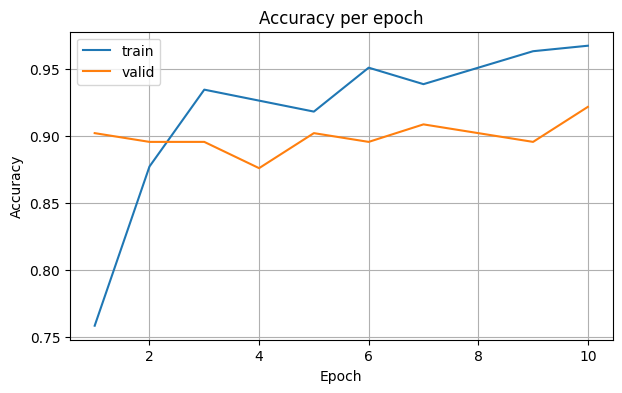

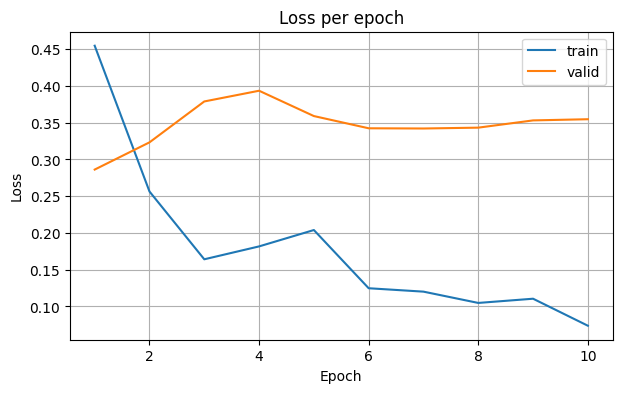

In [ ]:
plot_history(history_mixed)

Качество улучшается, но снова видим переобучения. Если фичи, пусть и плохо обученные - если мы меняем их слишком сильно, то сеть будет переобучаться, сильнее меняется классификатор

Можно сделать так: меньше изменять фичи в feature extractor и сильнее в классификаторе. То есть меняем learning rate

Итого на данный момент:

Valid | loss: 0.3277 | acc: 0.8954

Valid | loss: 0.2872 | acc: 0.9020

Valid | loss: 0.3546 | acc: 0.9216

**Вопрос 1 (важный):** С чем связано повышение качества если мы перестаем учить всю сеть? (Подсказка: посмотрите на датасет и на то, как он согласуется с 4-мя ситуациями, описанными выше)

**Ответ (важный):** <Ваш ответ>

**Вопрос 2**: Почему разморозка последних слоев не дает прироста к точности, хотя разморозить несколько последних слоев обычно хорошее решение для классификации похожего датасета? (Вопрос на внимательность)

**Ответ:** <Ваш ответ>

# AlexNet. Работаем с lr

Существует еще один интересный способ. Мы не хотим, чтобы ядра в свертках сильно менялись во время обучения, а еще мы знаем, что чем меньше lr, тем меньше изменения. Давайте уменьшим lr на feature extractor-е! Разберемся как это сделать...

In [ ]:
model_mixed_lr = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096

# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed_lr.classifier[6] = nn.Linear(num_features, 2)

model_mixed_lr = model_mixed_lr.to(device)

In [ ]:
optimizer = torch.optim.Adam(
    [
        {"params": model_mixed_lr.features.parameters(), "lr": 1e-6},
        {"params": model_mixed_lr.classifier.parameters(), "lr": 1e-4},
    ]
)

loss_func = nn.CrossEntropyLoss()

In [ ]:
history_alexnet_mixed_lr = train_func(
    model=model_mixed_lr,
    num_epochs=10,
    dataloaders=loaders,
    optimizer=optimizer,
    loss_func=loss_func
)


Epoch: 1


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.6032 | acc: 0.6680


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2690 | acc: 0.9085

Epoch: 2


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2941 | acc: 0.8811


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2539 | acc: 0.9020

Epoch: 3


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1984 | acc: 0.9262


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2647 | acc: 0.8954

Epoch: 4


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2268 | acc: 0.9139


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2717 | acc: 0.9020

Epoch: 5


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1316 | acc: 0.9467


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2927 | acc: 0.9020

Epoch: 6


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1142 | acc: 0.9508


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3198 | acc: 0.8889

Epoch: 7


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1270 | acc: 0.9426


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3349 | acc: 0.8889

Epoch: 8


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1028 | acc: 0.9631


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3323 | acc: 0.8889

Epoch: 9


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1099 | acc: 0.9549


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3180 | acc: 0.9020

Epoch: 10


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.0944 | acc: 0.9836


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3215 | acc: 0.9216


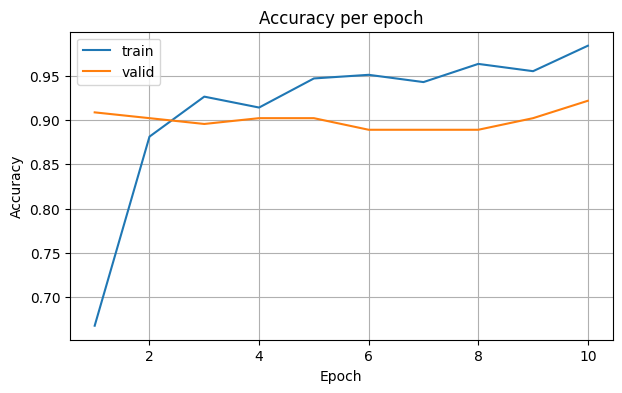

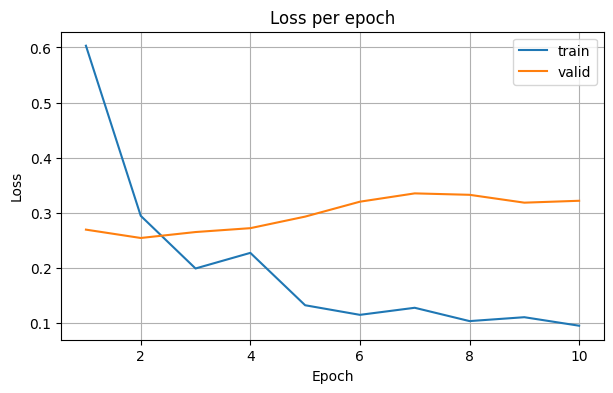

In [ ]:
plot_history(history_alexnet_mixed_lr)

Получилось тоже самое

Итого на данный момент:

Valid | loss: 0.3277 | acc: 0.8954

Valid | loss: 0.2872 | acc: 0.9020

Valid | loss: 0.3546 | acc: 0.9216

Valid | loss: 0.3215 | acc: 0.9216

Давайте поменяем архитекутуру сети, например на ResNet

Другие, более современные нейросети

**Вопрос:** Какую стратегию Вы выберете, учитывая размер и специфику нового датасета?

**Ответ:** <Ваш ответ>

## ResNet 18

План такой:

При полной заморозке неправильно прокидываются градиенты, но мы можем сначала обучить классификатор (как во 2 пункте), а потом уже разморозитьвсе остальные веса и дообучить их

И таким образом возможно такой вариант будет лучше

In [ ]:
model_extractor = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)


In [ ]:
model_extractor

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

У нас 4 слоя с residual connections и в конце классификатор. Хотим изменить out_features= 1000

In [ ]:
# 1) замораживаем параметры (веса)
for p in model_extractor.parameters():
    p.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 512

# 2) Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.fc = nn.Linear(num_features, 2)

# новый слой обучаем
for p in model_extractor.fc.parameters():
    p.requires_grad = True

model_extractor = model_extractor.to(device)
loss_func = nn.CrossEntropyLoss()
# Обучаем только классификатор
optimizer = optim.Adam(model_extractor.fc.parameters(), lr=1e-3)

In [ ]:
history_resnet_step1= train_func(
    model=model_extractor,
    num_epochs=10,
    dataloaders=loaders,
    optimizer=optimizer,
    loss_func=loss_func
)


Epoch: 1


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.6356 | acc: 0.6270


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.5023 | acc: 0.7843

Epoch: 2


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.5035 | acc: 0.7910


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.4410 | acc: 0.8431

Epoch: 3


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.4024 | acc: 0.8770


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3346 | acc: 0.9085

Epoch: 4


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.3528 | acc: 0.8689


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2949 | acc: 0.9085

Epoch: 5


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.3042 | acc: 0.8852


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2731 | acc: 0.9150

Epoch: 6


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2566 | acc: 0.9385


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2471 | acc: 0.9281

Epoch: 7


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2798 | acc: 0.9098


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2364 | acc: 0.9346

Epoch: 8


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2455 | acc: 0.9262


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2192 | acc: 0.9346

Epoch: 9


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2454 | acc: 0.9180


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2055 | acc: 0.9412

Epoch: 10


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.2425 | acc: 0.9098


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.1987 | acc: 0.9412


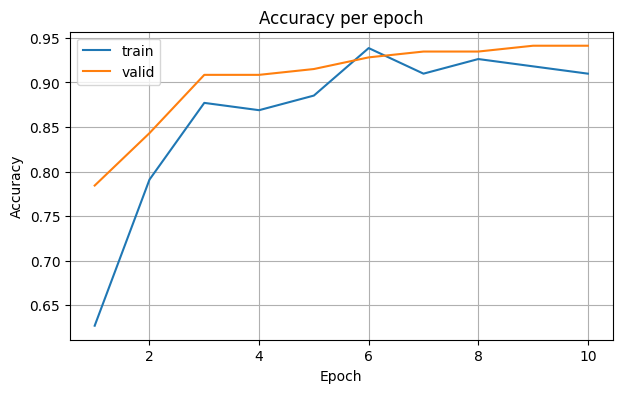

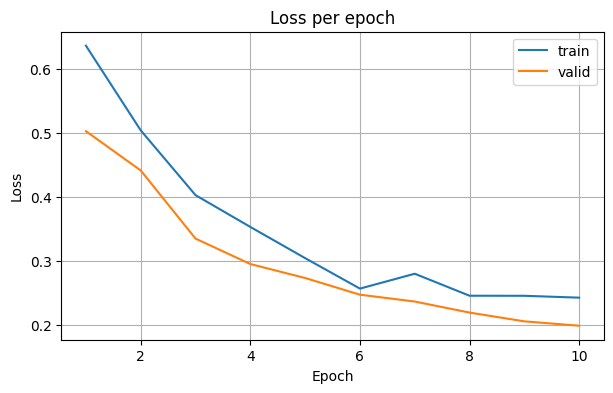

In [ ]:
plot_history(history_resnet_step1)

Итого на данный момент:

Valid | loss: 0.3277 | acc: 0.8954

Valid | loss: 0.2872 | acc: 0.9020

Valid | loss: 0.3546 | acc: 0.9216

Valid | loss: 0.3215 | acc: 0.9216

ResNet 1 step:
Valid | loss: 0.1987 | acc: 0.9412

Видим, что у ResNet есть преимущество, модель сильнее

2 этап. Пусть через эти слои течет градиент, также сделаем lr поменьше

In [ ]:
# размораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = True

optimizer = optim.Adam(model_extractor.parameters(), lr=1e-4)

In [ ]:
history_resnet_step2 = train_func(
    model=model_extractor,
    num_epochs=10,
    dataloaders=loaders,
    optimizer=optimizer,
    loss_func=loss_func
)


Epoch: 1


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1964 | acc: 0.9508


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.1840 | acc: 0.9477

Epoch: 2


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1214 | acc: 0.9549


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2198 | acc: 0.9216

Epoch: 3


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.0857 | acc: 0.9754


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.1825 | acc: 0.9346

Epoch: 4


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.0501 | acc: 0.9836


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.1981 | acc: 0.9477

Epoch: 5


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1019 | acc: 0.9590


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2124 | acc: 0.9412

Epoch: 6


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.0890 | acc: 0.9672


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.4797 | acc: 0.8627

Epoch: 7


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.0645 | acc: 0.9713


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2880 | acc: 0.9150

Epoch: 8


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.0334 | acc: 0.9918


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2111 | acc: 0.9477

Epoch: 9


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.0389 | acc: 0.9836


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.3315 | acc: 0.9216

Epoch: 10


  0%|          | 0/8 [00:00<?, ?it/s]

Train | loss: 0.1001 | acc: 0.9713


  0%|          | 0/2 [00:00<?, ?it/s]

Valid | loss: 0.2507 | acc: 0.9477


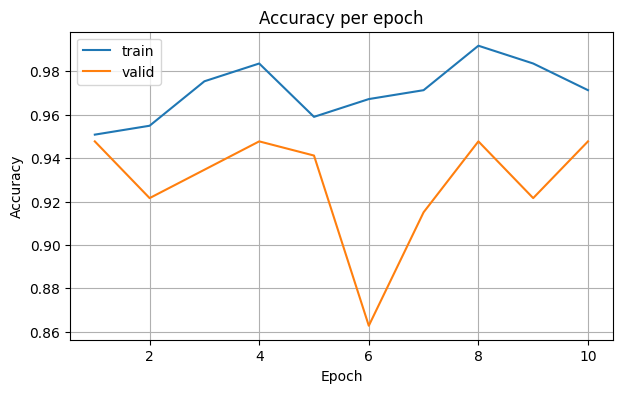

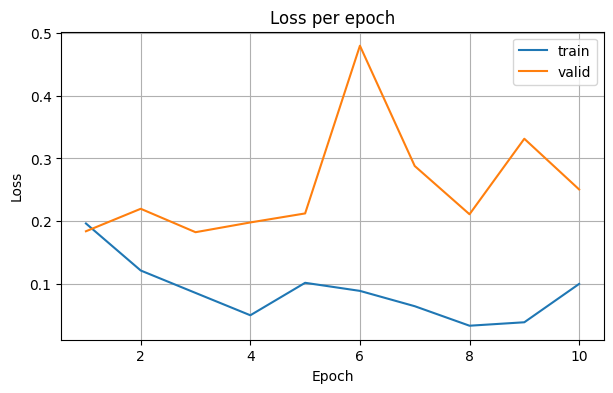

In [ ]:
plot_history(history_resnet_step2)

Итого на данный момент:

Valid | loss: 0.3277 | acc: 0.8954

Valid | loss: 0.2872 | acc: 0.9020

Valid | loss: 0.3546 | acc: 0.9216

Valid | loss: 0.3215 | acc: 0.9216

ResNet 1 step:
Valid | loss: 0.1987 | acc: 0.9412

ResNet 2 step:
Valid | loss: 0.2507 | acc: 0.9477

Accuracy возросло, но графики нестабильные, как метрика, так и лосс, есть переобучение

В данном случае метод не помог. Это может быть связано с тем, что датасет маленький и не слишком эффективно обучать фичи на первых слоях. Чем меньше датасет, тем сложнее на нем обучиться и не переобучиться

Но обычно это довольно хороший метод, довольно часто используют модель: заморозка всех слоев и обучение классификаторов, разморозка и обучение всего

Итог:

Если есть задача классификации, лучше использовать что-то предобученное. Никто не знает какую модель лучше брать, но для начала лучше брать модели с меньшим количеством параметров, надо пробовать разные архитектуры сетей

Например, лучше брать ResNet-18, а не ResNet-50, VGG-16, а не VGG-19, и уже потом решать в какую сторону двигаться

Есть более новомодные сетки типа Fishnet, там есть специальные свертки и активация

Если данных много, переобучиться на них сложнее, можем морозить некоторые фичи в сверточных слоях. Если нет, то лучше замораживать параметров кроме последнего слоя, так хуже переобучаемся

Но заранее нельзя сказать какой из методов поможет, поэтому лучше попробовать все


<h2 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *cs231n: http://cs231n.github.io/transfer-learning/*

2). *Туториал на PyTorch Tutorials: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial*

3). *Статья на Medium про TL в PyTorch: https://medium.com/@14prakash/almost-any-image-classification-problem-using-pytorch-i-am-in-love-with-pytorch-26c7aa979ec4*  